In [10]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from ipywidgets import FloatProgress
from IPython.display import display

plt.style.use('seaborn-white')

# Dynamics of the Leader of N Brownian Particles

- Brownian particles with diffusion coefficient $D$ : 
$$X_i(t), \: X_i(t=0)=0, \: \sigma(t)=\sqrt{2Dt}$$
- The leader is defined :
$$X_{lead}(t) := \underset{1\leqslant i \leqslant N}{Max} \:\; X_i(t)$$
- PDF of $X_i(t)$ :
$$p(x,t)=\frac{1}{\sigma(t)\sqrt{2\pi}}\exp{(-\frac{x^2}{2\sigma^2})}$$

### One realization:

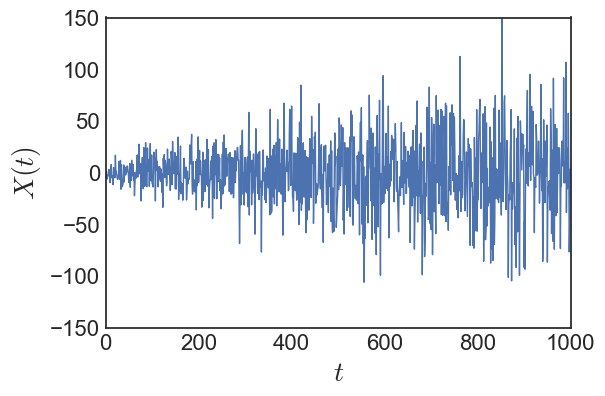

In [67]:
mu = 0
D = 1
n = 1000
t = np.arange(n)
sigma = np.sqrt(2*D*t)
sigma[0] = 1

x1 = np.random.normal(mu, sigma, n)
x1[0] = 0
plt.plot(x1, '-')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$X(t)$', fontsize=20)

- Computational procedure for the leader problem:

|Step Number|Step Description|Matrix Form|
|:----:|:---|:----------:|
|1|A Brownian process $B^{(1)}$ consists of $t$ steps; that can be thought as $X^{(1)}_1, X^{(1)}_2, \dots, X^{(1)}_t$|$X[t]$|
|2|A system consists of $N$ Brownian random variables each with $t$ steps; for the purpose of computing leader.|$X[N,t]$|
|3|$n$ realizations of the set of $N$ Brownian random variables are sampled.|$X[n,N,t]$|
|4|For each realization at each time $t$, the Maximum of $N$ random variable $X^{(1)}_t, X^{(2)}_t, \dots, X^{(N)}_t$ is extracted.|$X_{lead}[n,t]$|
|5|There are $n$ number of $X_{lead}$ s at each $t$; so we can consider $X_{lead}$ as a function of $n, t$.|$X_{lead}[n,t]$|
|6|${\left \langle X_{lead}(n,t) \right \rangle}_n$ and $\sigma_{X_{lead}}(t)$ are computed.|$X_{lead}[t]$, $\sigma_{X_{lead}}[t]$|
|7|${\left \langle X_{lead}(n,t) \right \rangle}_n$ should be similar to $a_N$|   |


- For any N, the typical value of $X_{max}$ is:
$$a_N=\sigma(t)\sqrt{2 \ln N}-\frac{\sigma(t)}{2}\frac{\ln(\ln N)}{\sqrt{2\ln N}}+\cdots$$
- For large but finite $N$:
$$X_{lead}(t)\sim \underset{a_N}{\underbrace{\sigma(t)\sqrt{2\ln N}-\frac{\sigma(t)}{2}\frac{\ln(\ln N)}{\sqrt{2\ln N}}}} + \underset{b_N}{\underbrace{\frac{\sigma(t)}{\sqrt{2\ln N}}}}\: \mathbb{N}(0,1)$$

In [25]:
%%time
mu = 0
D = 1
nt = 30000
stepT = 1000
ntComp = nt//stepT
t = np.arange(0, nt, stepT)
sigma = np.sqrt(2*D*t)
sigma[0] = 1

N = 5000
n = 1000
x = np.random.normal(mu, sigma, (N,n,ntComp))
leader = x.max(axis=0)
leaderMeans = leader.mean(axis=0)
leaderStds = leader.std(axis=0)

Wall time: 14.3 s


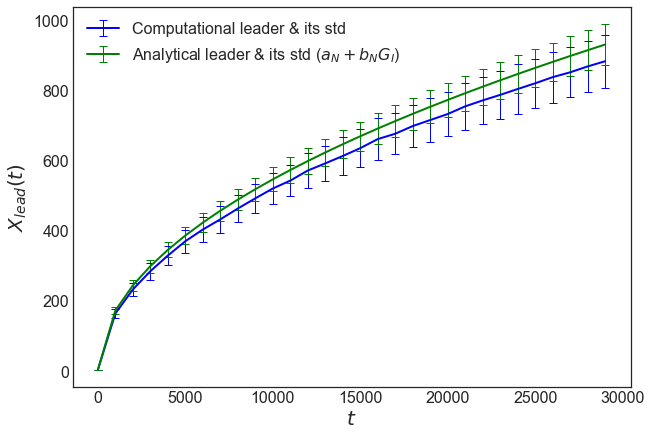

In [26]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$X_{lead}(t)$', fontsize=20)
# plt.plot(t, leaderMeans, label='Computational leader')
plt.errorbar(t, leaderMeans, yerr=leaderStds, label='Computational leader & its std', fmt='b-', lw=2, capsize=4, elinewidth=1)

# plt.plot(t, np.sqrt(2*np.log(N))*sigma, 'r-', label='Leading term of $a_N$ for large $N$')
# plt.plot(np.sqrt(2*np.log(N))*sigma + sigma/np.sqrt(2*np.log(N)), 'k-', label='$a_N$')
# plt.plot(t, np.sqrt(2*np.log(N))*sigma - sigma*np.log(np.log(N))/np.sqrt(2*np.log(N))/2, 'g-', label='2-term $a_N$', lw=2)
plt.errorbar(t, np.sqrt(2*np.log(N))*sigma-sigma*np.log(np.log(N))/np.sqrt(2*np.log(N))/2, 
             yerr=sigma/np.sqrt(2*np.log(N)), label='Analytical leader & its std ($a_N+b_N G_I$)', fmt='g-', lw=2, capsize=4, elinewidth=1)

plt.legend(loc='best', fontsize=16)

## Statistics of $X_{max}$ in Gaussian Case:

- Computational procedure for $X_{max}$ statistics:

|Step Number|Statement|Matrix Form|
|:----:|:---|:----------:|
|1|A system consists of $N$ random variables $X_1, X_2, \dots, X_N$.|$X[N]$|
|2|$n$ realizations of $N$ variables are sampled.|$X[n,N]$|
|3|Maximum of each realization is extracted.|$X[n,N]$|
|4|There are $n$ number of $X_{max}$ s; so we can consider $X_{max}$ as a function of $n$.|$X_{max}[n]$|
|5|$\left \langle X_{max}(n) \right \rangle$ and $\sigma_{X_{max}}(n)$ are computed.|$X_{max}[n]$, $\sigma_{X_{max}}[n]$|
|6|$\left \langle X_{max}(n) \right \rangle$ should be similar to $a_N$|   |

<!---
- A system consists of $N$ random variables $X_1, X_2, \dots, X_N$. ($X[N]$)
- $n$ realizations of $N$ variables are sampled. ($X[n,N]$)
- Maximum of each realization is extracted. ($X_{max}[n]$)
- There are $n$ number of $X_{max}$ s; so we can consider $X_{max}$ as a function of $n$. ($X_{max}[n]$)
- $\left \langle X_{max}(n) \right \rangle$ and $\sigma_{X_{max}}(n)$ are computed. ($X_{max}[n]$), ($\sigma_{X_{max}}[n]$)
- $\left \langle X_{max}(n) \right \rangle$ should be similar to $a_N$.
-->

$$a_N=\sigma\sqrt{2 \ln N}-\frac{\sigma}{2}\frac{\ln(\ln N)}{\sqrt{2\ln N}}+\cdots$$
- For large but finite $N$:
$$m\sim \underset{a_N}{\underbrace{\sigma\sqrt{2\ln N}-\frac{\sigma}{2}\frac{\ln(\ln N)}{\sqrt{2\ln N}}}} + \underset{b_N}{\underbrace{\frac{\sigma}{\sqrt{2\ln N}}}}\: \mathbb{G_I}$$

In [3]:
%%time

mu = 0
D = 1
N = 100000
t = np.arange(N)
t[:] = 1
sigma = np.sqrt(2*D*t)
sigma[:] = 1
sigma[0] = 1

n = 2000
x = np.random.normal(mu, sigma, (n,N))
# leader = x.max(axis=0)

Wall time: 18.3 s


In [20]:
%%time
step = 1000
nComp = N//step
NN = range(2, N+1)
NPlot = NN[::step]
sigmaPlot = sigma[::step]
xmaxMeans = np.zeros([nComp], dtype=np.float64)
xmaxStds = np.zeros([nComp], dtype=np.float64)
xmaxMeans[:] = x[0,::step]
xmaxStds[:] = 0

f = FloatProgress(min=0, max=nComp)
display(f)

for i in range(1, nComp):
    xmax = x[:,:i*step].max(axis=1)
    xmax_mean = xmax.mean(axis=0)
    xmax_std = xmax.std(axis=0)
    xmaxMeans[i] = xmax_mean
    xmaxStds[i] = xmax_std
    f.value = i
    
#     if i == 2:
#         a1,b1 = np.histogram(xmax, bins=30, normed=True)
    if i == 10:
        a1,b1 = np.histogram(xmax, bins=30, normed=True)
    if i == 30:
        a2,b2 = np.histogram(xmax, bins=30, normed=True)
    if i == 99:
        a3,b3 = np.histogram(xmax, bins=30, normed=True)

f.close()

Wall time: 15.2 s


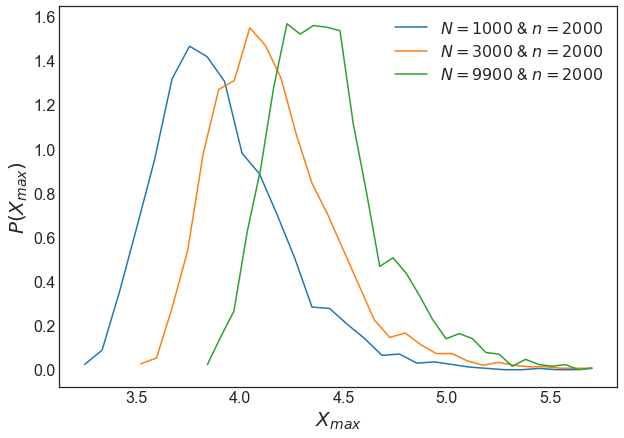

In [21]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$X_{max}$', fontsize=20)
plt.ylabel('$P(X_{max})$', fontsize=20) #Typical value of $X_{max}(t)$
plt.plot(b1[1:], a1, label='$N=1000$ & $n={}$'.format(n))
plt.plot(b2[1:], a2, label='$N=3000$ & $n={}$'.format(n))
plt.plot(b3[1:], a3, label='$N=9900$ & $n={}$'.format(n))
plt.legend(loc='best', fontsize=16)

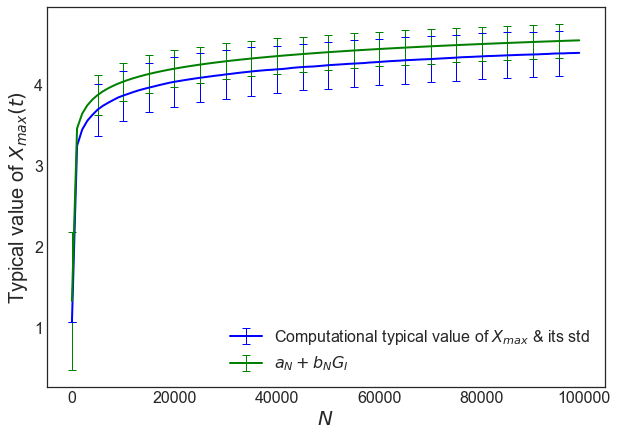

In [23]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$N$', fontsize=20)
plt.ylabel('Typical value of $X_{max}(t)$', fontsize=20)
plt.errorbar(NPlot, xmaxMeans, yerr=xmaxStds, label='Computational typical value of $X_{max}$ & its std', 
             fmt='b-', lw=2, capsize=4, elinewidth=1, errorevery=5)
# plt.plot(range(0, N, step), xmaxMeans, 'k-', label='Computational typical value of $X_{max}$', lw=2)
# plt.plot(np.sqrt(2*np.log(NN))*sigma, 'r-', label='Analytical leading term of $a_N$ for large $N$')
# plt.plot(np.sqrt(2*np.log(NN))*sigma - sigma*np.log(np.log(NN))/np.sqrt(2*np.log(NN))/2, 'g-', 
#          label='Analytical 2-term $a_N$', lw=2)

plt.errorbar(NPlot, np.sqrt(2*np.log(NPlot))*sigmaPlot-
             sigmaPlot*np.log(np.log(NPlot))/np.sqrt(2*np.log(NPlot))/2, 
             yerr=sigmaPlot/np.sqrt(2*np.log(NPlot)), label='$a_N+b_N G_I$', 
             fmt='g-', lw=2, capsize=4, elinewidth=1, errorevery=5)

plt.legend(loc='best', fontsize=16)